<a href="https://colab.research.google.com/github/codejawk/CNN-in-TF/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A step forward in the battle of human existence in the pandemic of covid-19. 


> Maintain social distancing

> Wash hands continously.

> Gear up  masks and gloves.








In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
from zipfile import ZipFile
file_name="dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done") 

Done


In [ ]:
print(len(os.listdir('/content/dataset/with_mask')))
print(len(os.listdir('/content/dataset/without_mask')))

690
686


In [ ]:
try:
    #YOUR CODE GOES HERE
    os.mkdir('/content/mask-no-mask')
    os.mkdir('/content/mask-no-mask/training')
    os.mkdir('/content/mask-no-mask/testing')
    os.mkdir('/content/mask-no-mask/training/mask')
    os.mkdir('/content/mask-no-mask/testing/mask')
    os.mkdir('/content/mask-no-mask/training/no_mask')
    os.mkdir('/content/mask-no-mask/testing/no_mask')
except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    files=[]
    for filename in os.listdir(SOURCE):
        file=SOURCE+filename
        if os.path.getsize(file)>0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
            
            
    training_length=int(len(files)*SPLIT_SIZE)
    testing_length=int(len(files)-training_length)
    shuffled_set=random.sample(files,len(files))
    training_set=shuffled_set[:training_length]
    testing_set=shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
    
mask_source_dir="/content/dataset/with_mask/"
training_mask_dir="/content/mask-no-mask/training/mask/"
testing_mask_dir="/content/mask-no-mask/testing/mask/"

no_mask_source_dir="/content/dataset/without_mask/"
training_no_mask_dir="/content/mask-no-mask/training/no_mask/"
testing_no_mask_dir="/content/mask-no-mask/testing/no_mask/"

split_size = .75
split_data(mask_source_dir, training_mask_dir, testing_mask_dir, split_size)
split_data(no_mask_source_dir, training_no_mask_dir, testing_no_mask_dir, split_size)

In [ ]:
print(len(os.listdir(training_mask_dir)))
print(len(os.listdir(training_no_mask_dir)))
print(len(os.listdir(testing_mask_dir)))
print(len(os.listdir(testing_no_mask_dir)))

679
671
409
397


In [ ]:
model = tf.keras.models.Sequential([
# YOUR CODE HERE
   tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(261,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
TRAINING_DIR =  "/content/mask-no-mask/training"
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest',
)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))


VALIDATION_DIR = "/content/mask-no-mask/testing"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=10,
                                                              class_mode='binary',
                                                              target_size=(150, 150))


# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 1350 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=30,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=20,  # 1000 images = batch_size * steps
                 verbose=2)

Epoch 1/30
30/30 - 2s - loss: 0.6523 - acc: 0.6967 - val_loss: 0.5926 - val_acc: 0.8650
Epoch 2/30
30/30 - 1s - loss: 0.4853 - acc: 0.8767 - val_loss: 0.3429 - val_acc: 0.9500
Epoch 3/30
30/30 - 2s - loss: 0.2912 - acc: 0.9200 - val_loss: 0.2364 - val_acc: 0.9000
Epoch 4/30
30/30 - 2s - loss: 0.2137 - acc: 0.9333 - val_loss: 0.1565 - val_acc: 0.9650
Epoch 5/30
30/30 - 2s - loss: 0.1363 - acc: 0.9500 - val_loss: 0.1451 - val_acc: 0.9400
Epoch 6/30
30/30 - 2s - loss: 0.1877 - acc: 0.9233 - val_loss: 0.1254 - val_acc: 0.9500
Epoch 7/30
30/30 - 1s - loss: 0.1489 - acc: 0.9367 - val_loss: 0.1340 - val_acc: 0.9550
Epoch 8/30
30/30 - 1s - loss: 0.1301 - acc: 0.9533 - val_loss: 0.0723 - val_acc: 0.9800
Epoch 9/30
30/30 - 2s - loss: 0.0901 - acc: 0.9733 - val_loss: 0.0670 - val_acc: 0.9700
Epoch 10/30
30/30 - 2s - loss: 0.1247 - acc: 0.9600 - val_loss: 0.0908 - val_acc: 0.9650
Epoch 11/30
30/30 - 2s - loss: 0.1214 - acc: 0.9500 - val_loss: 0.1047 - val_acc: 0.9500
Epoch 12/30
30/30 - 2s - loss:

Text(0.5, 1.0, 'Training and validation loss')

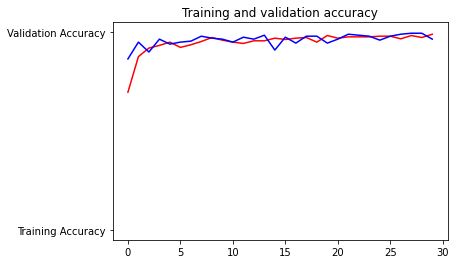

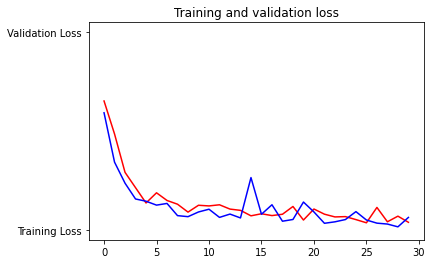

In [ ]:
 # PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " without mask")
    
  else:
    print(fn + " mask")
 

Saving mask4.jpg to mask4.jpg
[0.]
mask4.jpg mask
